In [1]:
#Here we are importing the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
#Extracting data from the time variant data base 
df = pd.read_csv('time_var.txt', header = None, delimiter =r"\s+" )
df.columns = ["Id", "Edu", "Ln(w)", "PoEp", "Ttd"]

#We are taking the first observation of every invividual in the entire dataset
df = df.drop_duplicates(subset='Id', keep='first') 
print(df)

         Id  Edu  Ln(w)  PoEp  Ttd
0         1   13   1.82     1    0
4         2   15   2.14     4    6
13        3   10   1.56     1    2
14        4   12   1.85     1    3
26        5   15   2.41     2    3
...     ...  ...    ...   ...  ...
17878  2174   14   2.43     2    2
17888  2175   14   2.51     2    4
17897  2176   12   1.76     3    4
17906  2177    9   1.92     5    2
17918  2178   11   1.59     2    2

[2178 rows x 5 columns]


In [112]:
#Extracting data from the time invariant data set
dl = pd.read_csv('time_invar.txt', header = None, delimiter =r"\s+" )
dl.columns = ["Tia","Medu","Fedu","Bh","No.of Sib"]

#Adding a column of constants
dl["Id"]=dl.index +1 
dl["Constants"]=1
print(dl)

       Tia  Medu  Fedu  Bh  No.of Sib    Id  Constants
0     1.00    12    12   0          1     1          1
1     1.50    12    12   0          1     2          1
2    -0.36    12    12   1          1     3          1
3     0.26    12    10   1          4     4          1
4     0.30    12    12   1          1     5          1
...    ...   ...   ...  ..        ...   ...        ...
2173  0.46     6     8   0         13  2174          1
2174  1.08    16    14   0          2  2175          1
2175 -1.79     4     6   0          6  2176          1
2176  0.44     8     6   0          4  2177          1
2177 -0.35     8     8   1          6  2178          1

[2178 rows x 7 columns]


In [113]:
#Merging both the databasses and creating a new database 
dnew = pd.merge(df, dl, on='Id', how='outer')
print(dnew)

        Id  Edu  Ln(w)  PoEp  Ttd   Tia  Medu  Fedu  Bh  No.of Sib  Constants
0        1   13   1.82     1    0  1.00    12    12   0          1          1
1        2   15   2.14     4    6  1.50    12    12   0          1          1
2        3   10   1.56     1    2 -0.36    12    12   1          1          1
3        4   12   1.85     1    3  0.26    12    10   1          4          1
4        5   15   2.41     2    3  0.30    12    12   1          1          1
...    ...  ...    ...   ...  ...   ...   ...   ...  ..        ...        ...
2173  2174   14   2.43     2    2  0.46     6     8   0         13          1
2174  2175   14   2.51     2    4  1.08    16    14   0          2          1
2175  2176   12   1.76     3    4 -1.79     4     6   0          6          1
2176  2177    9   1.92     5    2  0.44     8     6   0          4          1
2177  2178   11   1.59     2    2 -0.35     8     8   1          6          1

[2178 rows x 11 columns]


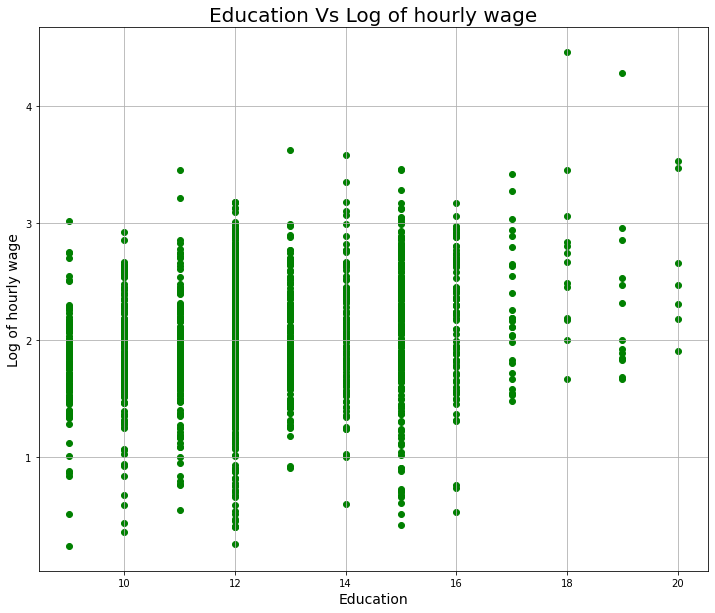

In [127]:
#Question 1

#Plotting the scatter plot for Education and Log of hourly wage
plt.figure(figsize=(12,10))
plt.scatter(dnew['Edu'], dnew['Ln(w)'], color='green')
plt.title('Education Vs Log of hourly wage', fontsize=20)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Log of hourly wage', fontsize=14)
plt.grid(True)

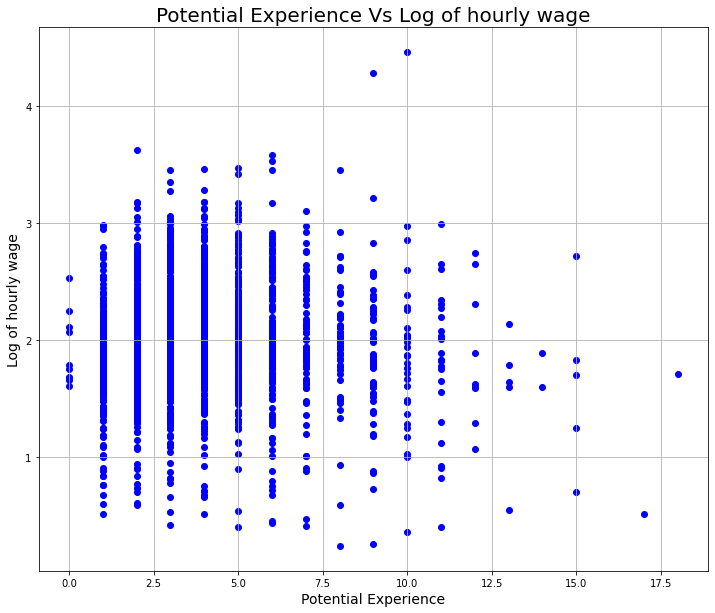

In [121]:
#Scatter plot for Potential Experience and Log of hourly wage
plt.figure(figsize=(12,10))
plt.scatter(dnew['PoEp'], dnew['Ln(w)'], color='blue')
plt.title('Potential Experience Vs Log of hourly wage', fontsize=20)
plt.xlabel('Potential Experience', fontsize=14)
plt.ylabel('Log of hourly wage', fontsize=14)
plt.grid(True)

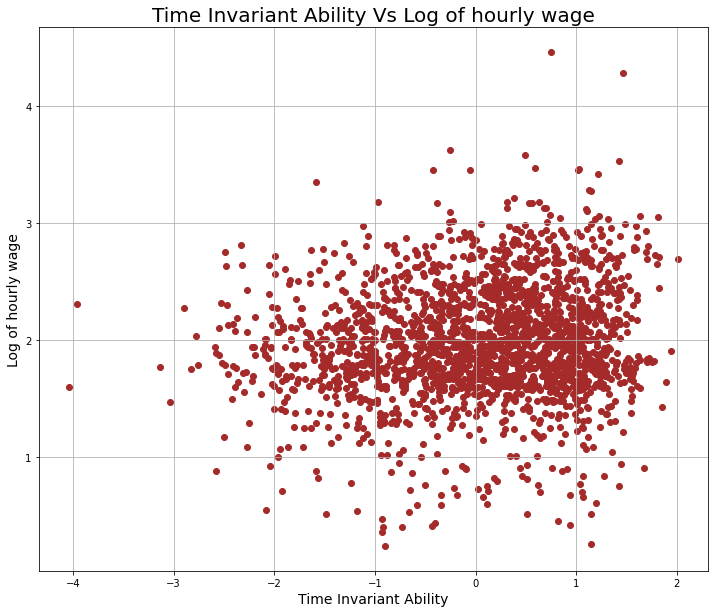

In [122]:
#Scatter plot for Time invariant ability and Log of hourly wage
plt.figure(figsize=(12,10))
plt.scatter(dnew['Tia'], dnew['Ln(w)'], color='brown')
plt.title('Time Invariant Ability Vs Log of hourly wage', fontsize=20)
plt.xlabel('Time Invariant Ability', fontsize=14)
plt.ylabel('Log of hourly wage', fontsize=14)
plt.grid(True)

In [142]:
#Making an object of DataFrame for the variables in X2(with a column of constants), which consist of Mother's Education, Father's education and Number of Siblings
cols1 = [6,7,9]
X2 = dnew[dnew.columns[cols1]]
print(X2)

      Medu  Fedu  No.of Sib
0       12    12          1
1       12    12          1
2       12    12          1
3       12    10          4
4       12    12          1
...    ...   ...        ...
2173     6     8         13
2174    16    14          2
2175     4     6          6
2176     8     6          4
2177     8     8          6

[2178 rows x 3 columns]


In [125]:
#Making an object of DataFrame for the variables in X1(with a column of constants), which consists of Education, Potential Experience and Time invariant Ability
cols2=[10,1,3,5]
X1 = dnew[dnew.columns[cols2]]
print(X1)

      Constants  Edu  PoEp   Tia
0             1   13     1  1.00
1             1   15     4  1.50
2             1   10     1 -0.36
3             1   12     1  0.26
4             1   15     2  0.30
...         ...  ...   ...   ...
2173          1   14     2  0.46
2174          1   14     2  1.08
2175          1   12     3 -1.79
2176          1    9     5  0.44
2177          1   11     2 -0.35

[2178 rows x 4 columns]


In [126]:
#Making an object of DataFrame for all the relevant variables in X(with a column of constants)
cols = [10,1,3,5,6,7,9]
X = dnew[dnew.columns[cols]]
print(X)

      Constants  Edu  PoEp   Tia  Medu  Fedu  No.of Sib
0             1   13     1  1.00    12    12          1
1             1   15     4  1.50    12    12          1
2             1   10     1 -0.36    12    12          1
3             1   12     1  0.26    12    10          4
4             1   15     2  0.30    12    12          1
...         ...  ...   ...   ...   ...   ...        ...
2173          1   14     2  0.46     6     8         13
2174          1   14     2  1.08    16    14          2
2175          1   12     3 -1.79     4     6          6
2176          1    9     5  0.44     8     6          4
2177          1   11     2 -0.35     8     8          6

[2178 rows x 7 columns]


In [138]:
#Question 2

#Calculating the correlation between the variables in X and Y 
x1 = X["Edu"]
x2 = X["PoEp"]
x3 = X["Tia"]
x4 = X["Medu"]
x5 = X["Fedu"]
x6 = X["No.of Sib"]
y = dnew["Ln(w)"]

#Calculating the correlation between Education and Log of Hourly Wage
correlation1 = x1.corr(y)

#Calculating the correlation between Potential Experience and Log of Hourly Wage
correlation2 = x2.corr(y)

#Calculating the correlation between Time invarinat ability and Log of Hourly Wage
correlation3 = x3.corr(y)

#Calculating the correlation between Mother's Education and Log of Hourly Wage
correlation4 = x4.corr(y)

#Calculating the correlation between Father's Education and Log of Hourly Wage
correlation5 = x5.corr(y)

#Calculating the correlation between Number of Siblings and Log of Hourly Wage
correlation6 = x6.corr(y)

#Printing the correlations
print("The correlation between Education and Log of Hourly Wage is" , correlation1)
print("The correlation between Potential Experience and Log of Hourly Wage is" ,correlation2)
print("The correlation between Time invarinat ability and Log of Hourly Wage is" ,correlation3)
print("The correlation between Mother's Education and Log of Hourly Wage is" ,correlation4)
print("The correlation between Father's Education and Log of Hourly Wage is" ,correlation5)
print("The correlation between Number of Siblings and Log of Hourly Wage is" ,correlation6)

The correlation between Education and Log of Hourly Wage is 0.24754521170060484
The correlation between Potential Experience and Log of Hourly Wage is 0.02501193939926678
The correlation between Time invarinat ability and Log of Hourly Wage is 0.13158660690245647
The correlation between Mother's Education and Log of Hourly Wage is 0.09297380569622002
The correlation between Father's Education and Log of Hourly Wage is 0.09921399054590752
The correlation between Number of Siblings and Log of Hourly Wage is -0.04608769623705631


In [141]:
#Question 4

#Calculating the beta for the regression of y on X without built-in functions 

#Calculating Xtranspose 
X_T = X.transpose()

#Calculation the product of Xtranspose and X
X_ = X_T.dot(X)

Xa = X_.to_numpy()

#Calculating the inverse of the product of Xtranspose and X
Xi = np.linalg.inv(Xa)

XT = X_T.to_numpy()

#Calculating the projection matrix of y on X
Xp = np.dot(Xi,XT)
Y = y.to_numpy()

#Calculation the product of the projection matrix and y which gives us beta
B = np.dot(Xp,Y)
B_ = pd.DataFrame(B)

In [13]:
print(B_)

          0
0  1.165598
1  0.059207
2  0.014664
3  0.016176
4  0.001414
5  0.001214
6 -0.000364


In [14]:
#Question 5

#Importing the requisite statistical packages for running a regression
import statsmodels.api as sm
from sklearn import linear_model

In [89]:
#Using the built-in statistical package to run a regression of y on X
regr = linear_model.LinearRegression()
regr.fit(X, y)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Ln(w)   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     25.76
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           1.00e-29
Time:                        21:36:39   Log-Likelihood:                -1434.3
No. Observations:                2178   AIC:                             2883.
Df Residuals:                    2171   BIC:                             2922.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constants      1.1656      0.087     13.405      0.0

In [149]:
#Question 6

#Regressing Mother's Education on the variables in X and calculating the residuals
regr1 = linear_model.LinearRegression()
regr1.fit(X1, X2[X2.columns[0]])
X1 = sm.add_constant(X1)
model1 = sm.OLS(X2[X2.columns[0]], X1).fit()
predictions = model1.predict(X1) 
 
print_model = model1.summary()

#Printing the residuals of the regression
print(model1.resid)

0      -1.032798
1      -1.789061
2       1.272909
3       0.078607
4      -0.550282
          ...   
2173   -6.515224
2174    2.743293
2175   -5.273362
2176   -3.064734
2177   -2.867284
Length: 2178, dtype: float64


In [148]:
#Regressing Father's Education on the variables in X and calculating the residuals
regr2 = linear_model.LinearRegression()
regr2.fit(X1, X2[X2.columns[1]])
X1 = sm.add_constant(X1)
model2 = sm.OLS(X2[X2.columns[1]], X1).fit()
predictions = model2.predict(X1) 
 
print_model = model2.summary()

#Printing the residuals of the regression
print(model2.resid)

0      -1.608073
1      -2.714033
2       1.370417
3      -2.196109
4      -1.149597
          ...   
2173   -5.053518
2174    0.039984
2175   -3.008741
2176   -5.089092
2177   -2.879180
Length: 2178, dtype: float64


In [155]:
#Regressing Number of Siblings on the variables in X and calculating the residuals
regr3 = linear_model.LinearRegression()
regr3.fit(X1, X2[X2.columns[2]])
X1 = sm.add_constant(X1)
model3 = sm.OLS(X2[X2.columns[2]], X1).fit()
predictions = model3.predict(X1) 
 
print_model = model.summary()

#Printing the residuals of the regression
print(model3.resid)

0       -1.492661
1       -1.314354
2       -2.324047
3        1.104108
4       -1.710849
          ...    
2173    10.281822
2174    -0.445446
2175     2.070958
2176     0.687408
2177     2.692377
Length: 2178, dtype: float64


In [104]:
#X1T = X1.transpose()
#X1_ = X1T.dot(X1)
#X1i = np.linalg.inv(X1_.to_numpy())
#B1 = np.dot(np.dot(X1i, X1T.to_numpy()),X2[X2.columns[1]])
#E1 = pd.DataFrame(np.subtract(X2[X2.columns[1]].to_numpy(), np.dot(X1,B1)))
#B2 = np.dot(np.dot(X1i, X1T.to_numpy()),X2[X2.columns[2]])
#E2 = pd.DataFrame(np.subtract(X2[X2.columns[2]].to_numpy(), np.dot(X1,B2)))
#B3 = np.dot(np.dot(X1i, X1T.to_numpy()),X2[X2.columns[3]])
#E3 = pd.DataFrame(np.subtract(X2[X2.columns[3]].to_numpy(), np.dot(X1,B3)))

In [162]:
#Arranging the Residuals form the regressions of the columns of X2 on X in a new Dataframe called X2star
X2star = pd.concat([model1.resid, model2.resid, model3.resid], axis=1)
X2star.columns=['Res1','Res2','Res3']
print(X2star)

#Calculating and printing the sample means of the of the three residuals ,i.e, the three columns of the X2star
Mean = X2star.mean()
print(Mean)

          Res1      Res2       Res3
0    -1.032798 -1.608073  -1.492661
1    -1.789061 -2.714033  -1.314354
2     1.272909  1.370417  -2.324047
3     0.078607 -2.196109   1.104108
4    -0.550282 -1.149597  -1.710849
...        ...       ...        ...
2173 -6.515224 -5.053518  10.281822
2174  2.743293  0.039984  -0.445446
2175 -5.273362 -3.008741   2.070958
2176 -3.064734 -5.089092   0.687408
2177 -2.867284 -2.879180   2.692377

[2178 rows x 3 columns]
Res1   -5.700980e-15
Res2   -2.277945e-15
Res3   -8.563704e-17
dtype: float64


In [107]:
#Question 7

#Computing the least squares regression coefficients in the regression of y on X1
regrStar1 = linear_model.LinearRegression()
regrStar1.fit(X1, y)
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
predictions = model1.predict(X1) 
 
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Ln(w)   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     51.41
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           4.24e-32
Time:                        21:56:29   Log-Likelihood:                -1434.6
No. Observations:                2178   AIC:                             2877.
Df Residuals:                    2174   BIC:                             2900.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constants      1.1866      0.075     15.763      0.0

In [108]:
#Question 8

regrStar2 = linear_model.LinearRegression()
regrStar2.fit(X2, y)
X2 = sm.add_constant(X2)
model1 = sm.OLS(y, X2).fit()
predictions = model1.predict(X2) 
 
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Ln(w)   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.179
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           2.06e-05
Time:                        21:57:56   Log-Likelihood:                -1497.0
No. Observations:                2178   AIC:                             3002.
Df Residuals:                    2174   BIC:                             3025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constants      1.8156      0.050     36.291      0.0

In [109]:


regrStar2_ = linear_model.LinearRegression()
regrStar2_.fit(X2star, y)
X2star = sm.add_constant(X2star)
model1 = sm.OLS(y, X2star).fit()
predictions = model1.predict(X2star) 
 
print_model = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Ln(w)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1637
Date:                Sun, 18 Sep 2022   Prob (F-statistic):              0.921
Time:                        22:02:50   Log-Likelihood:                -1509.0
No. Observations:                2178   AIC:                             3026.
Df Residuals:                    2174   BIC:                             3049.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9809      0.010    190.918      0.0